In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf
from os import listdir
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [78]:
def read_file(dir:str):
    list = []
    for f in listdir(dir):
        list.append(cv2.imread(dir+f))
    return [image.max(axis=-1, keepdims=True) for image in list]
    #return np.array([(image.sum(axis=-1, keepdims=True)).reshape(-1) for image in list],dtype=np.uint8)

In [74]:
fonts = ["Carattere-Regular","Sacramento-Regular","Sevillana-Regular","SingleDay-Regular"]

In [79]:
x_train = np.concatenate([read_file(f"../resources/data/class_test/{font}/")for font in fonts])
x_train.shape

(8004, 50, 200, 1)

In [80]:
y_train = np.concatenate([([i]*int(len(x_train)/len(fonts))) for i in range(len(fonts))])
enc = OneHotEncoder(sparse_output=False)
y_train = enc.fit_transform(y_train.reshape(-1,1))
y_train.shape

(8004, 4)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.10, random_state=99)

In [85]:

tf.keras.backend.clear_session()
model = tf.keras.Sequential(
    [
        tf.keras.layers.GaussianNoise(0.15, input_shape=(50, 200, 1)),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3), strides=4),
        tf.keras.layers.SpatialDropout2D(0.2),
        tf.keras.layers.Conv2D(48, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3), strides=4),
        tf.keras.layers.SpatialDropout2D(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(4, activation="softmax")
    ]
)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Recall()])

In [86]:
tf.__version__

'2.10.1'

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise (GaussianNoi  (None, 50, 200, 1)       0         
 se)                                                             
                                                                 
 conv2d (Conv2D)             (None, 48, 198, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 49, 32)       0         
 )                                                               
                                                                 
 spatial_dropout2d (SpatialD  (None, 12, 49, 32)       0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 47, 48)        13872     
                                                        

In [88]:
history = model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
181/181 [==============================] - 2s 8ms/step - loss: 2.0412 - accuracy: 0.3566 - recall: 0.1437 - val_loss: 1.0940 - val_accuracy: 0.4913 - val_recall: 0.2505
Epoch 2/20
181/181 [==============================] - 1s 6ms/step - loss: 0.8827 - accuracy: 0.6274 - recall: 0.4669 - val_loss: 0.2168 - val_accuracy: 0.9257 - val_recall: 0.9105
Epoch 3/20
181/181 [==============================] - 1s 7ms/step - loss: 0.2357 - accuracy: 0.9110 - recall: 0.9049 - val_loss: 0.0251 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 4/20
181/181 [==============================] - 1s 6ms/step - loss: 0.0951 - accuracy: 0.9675 - recall: 0.9656 - val_loss: 0.0101 - val_accuracy: 0.9993 - val_recall: 0.9993
Epoch 5/20
181/181 [==============================] - 1s 6ms/step - loss: 0.0523 - accuracy: 0.9833 - recall: 0.9823 - val_loss: 0.0036 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 6/20
181/181 [==============================] - 1s 7ms/step - loss: 0.0285 - accuracy: 0.9913 

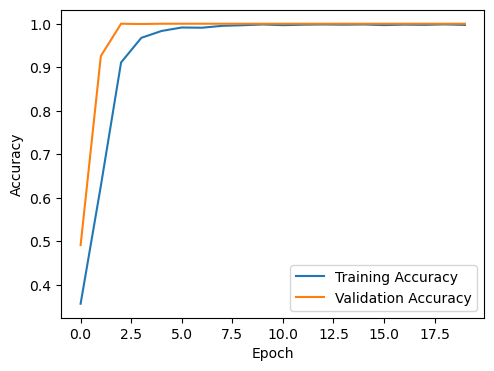

In [89]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [12]:
model.evaluate(x_test,y_test)

26/26 [==============================] - 0s 11ms/step - loss: 7.3671e-05 - accuracy: 1.0000


[7.367136277025566e-05, 1.0]

In [30]:
model.predict(np.array(x_test[7]).reshape(1,50,200,1))

1/1 [==============================] - 0s 53ms/step


array([[1.1928455e-12, 3.9021703e-10, 1.0000000e+00, 7.1138051e-09]],
      dtype=float32)

In [31]:
model.predict(np.array(x_test[6]).reshape(1,50,200,1))

1/1 [==============================] - 0s 18ms/step


array([[5.6923454e-07, 1.5888760e-07, 5.8903606e-07, 9.9999869e-01]],
      dtype=float32)

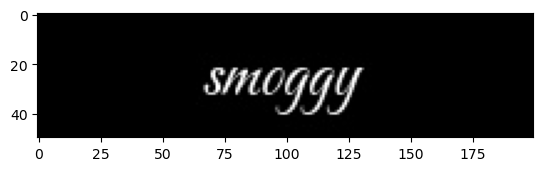

In [83]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

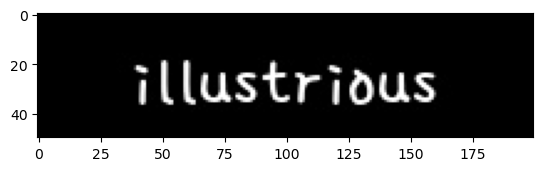

In [90]:
plt.imshow(x_test[6], cmap='gray')
plt.show()